### Laboratorio 3
Maria Alejandra Morales Miranda
 - Ciencia de Datos en Python
 - Seccion U

1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [18]:
import numpy as np

array1 = np.ones(1000, dtype=bool)
print(f"El tamaño del arreglo es {array1.nbytes}")

El tamaño del arreglo es 1000


2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [19]:
array2 = np.arange(100,0,-2)

print(f"Los últimos 10 elementos son: {array2[-10:]}")

Los últimos 10 elementos son: [20 18 16 14 12 10  8  6  4  2]


3. Dado el array [[2 4 5 6] [0 3 7 4] [8 8 5 2] [1 5 6 1]]. Seleccione con una instrucción el subarray de elementos [0 3 7 4]. Después, seleccione el subarray de elementos [[2 5] [8 5]]

In [20]:
# Se crea el array
ar03 = np.array([[2, 4, 5, 6],
                [0, 3, 7, 4],
                [8, 8, 5, 2],
                [1, 5, 6, 1]])

# Se selecciona el sub array [0 3 7 4]
subar01 = ar03[1:2, :]

# Se imprime el sub array [0 3 7 4]
print(f"El sub array 01 es: {subar01}")

# Se selecciona el sub array [[2 5] [8 5]]
subar02 = ar03[[0, 2], :][:, [0, 2]]

# Se imprime el sub array [[2 5] [8 5]]
print(f"El sub array 01 es: {subar02}")

El sub array 01 es: [[0 3 7 4]]
El sub array 01 es: [[2 5]
 [8 5]]


4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [21]:
# Dados los arrays
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

# Se calcula la diferencia
diff = a - b
print(f"La diferencia es: {diff}")

# Se calcula la media aritmetica
mean = np.mean(diff)
print(f"La media es: {mean}")

La diferencia es: [ 0  1  0 -2]
La media es: -0.25


5. Tengo valores de cordenadas (x, y) en las columnas del array [[1.33 4.5] [30.0 10.7] [70.2 0.5]]. Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [22]:
# Se crea el array original
ar04 = np.array([[1.33, 4.5],
                [30.0, 10.7],
                [70.2, 0.5]])

# Se agrega una nueva fila utilizando la función append de numpy y sobre el eje 0
ar04 = np.append(ar04, [np.array([37.1,-3.6])], axis=0)

# Se imprime el nuevo array
print(f"El nuevo array es: {ar04}")

# Se imprime la dimensión del array
print(f"La dimensión del array es: {ar04.shape}")

El nuevo array es: [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]
La dimensión del array es: (4, 2)


6. Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [23]:
# Se transpone el array usando la función T
ar04_transp = ar04.T

# Se agregan los nuevos pares de coordenadas
new_rows = np.array([[10.8, 3.0],
                     [35.8, 12.0]])

ar05 = np.concatenate((ar04_transp, new_rows.T), axis=1)

# Se imprime el nuevo array
print(f"El nuevo array es: {ar05}")

# Se imprime la dimensión del array
print(f"La dimensión del array es: {ar05.shape}")

El nuevo array es: [[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]
La dimensión del array es: (2, 6)


# Parte II

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NucleosPoblacion.csv')

1. ¿Cuántos municipios tienen más de 100000 habitantes?.

In [25]:
df1 = df[df['Poblacion']>100000]
print(f"Total de municipios con población mayor a 100000 habitantes: {len(df1)}")

Total de municipios con población mayor a 100000 habitantes: 62


2. Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda:

    a) ¿Cuál es la segunda ciudad más poblada?


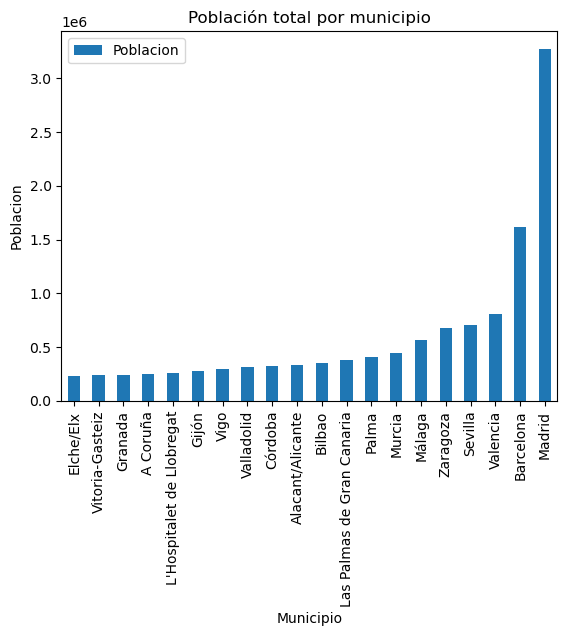

In [26]:
df2 = df.sort_values(by='Poblacion', ascending=True)


df_top20 = df2.tail(20)

ax = df_top20.plot.bar(x='Municipio', y='Poblacion', rot=0)


ax.set_xlabel('Municipio')
ax.set_ylabel('Poblacion')
ax.set_title('Población total por municipio')
ax.set_xticklabels(df_top20['Municipio'], rotation=90)
plt.show()

In [27]:

city = df_top20.iloc[-2]['Municipio']
print(f"La segunda ciudad más poblada es: {city}")

La segunda ciudad más poblada es: Barcelona


b) ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [28]:
df2 = df.sort_values(by='Poblacion', ascending=True).reset_index(drop=True)
pos = df2.loc[df2['Municipio'] == 'Granada'].index[0]+1

print(f"La posición de Granada en el ranking es: {pos}")

La posición de Granada en el ranking es: 835


3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [29]:

df_extremadura = df[(df['Provincia'] == 'Cáceres') | (df['Provincia'] == 'Badajoz')]

df_extremadura_population = df_extremadura[df_extremadura['Poblacion'] > 5000]

print(f"El total de municipios de Extremadura con más de 5000 habitantes es: {len(df_extremadura_population)}")

El total de municipios de Extremadura con más de 5000 habitantes es: 14


4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [30]:
idxmax_lat = df['Y'].idxmax()

northmost_city = df.loc[idxmax_lat,'Municipio']
prov = df.loc[idxmax_lat,'Provincia']
population = df.loc[idxmax_lat,'Poblacion']

print(f"La ciudad más al norte es {northmost_city} de la provincia de {prov} con {population} habitantes")

La ciudad más al norte es Viveiro de la provincia de Lugo con 16211.0 habitantes


5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [31]:
df_granada = df[df['Provincia'] == 'Granada']

df_granada['Poblacion'].describe()

count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64

6. Realice un histograma con la población de los Municipios para cada una de las provincias.

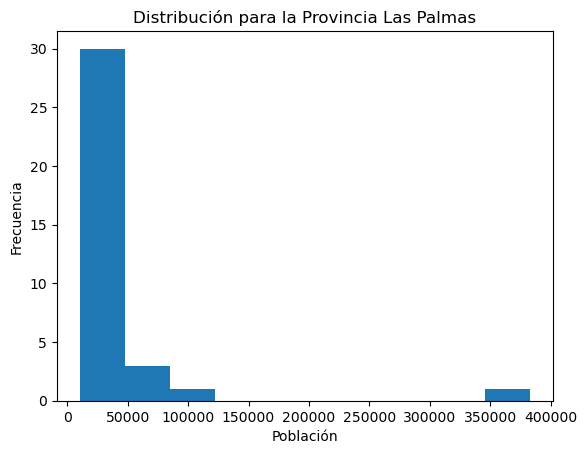

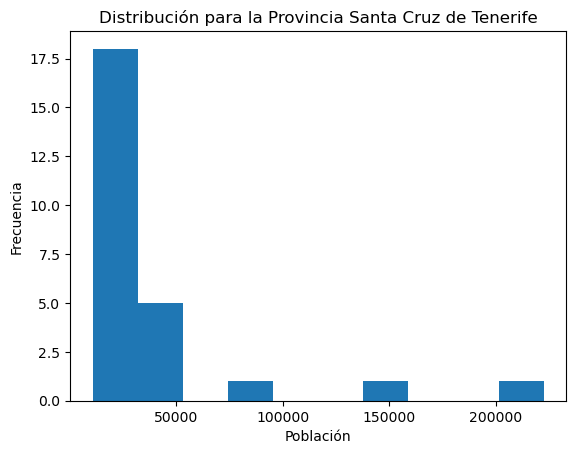

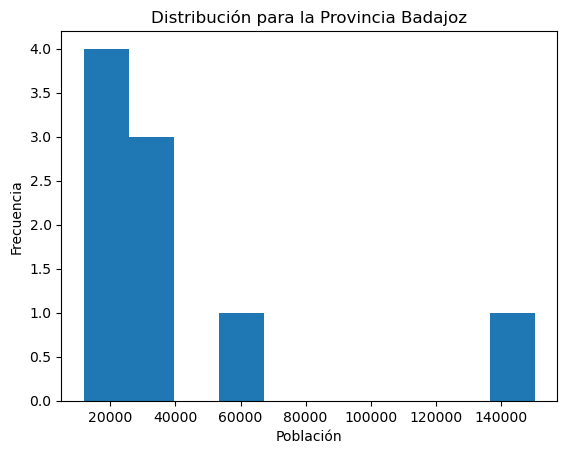

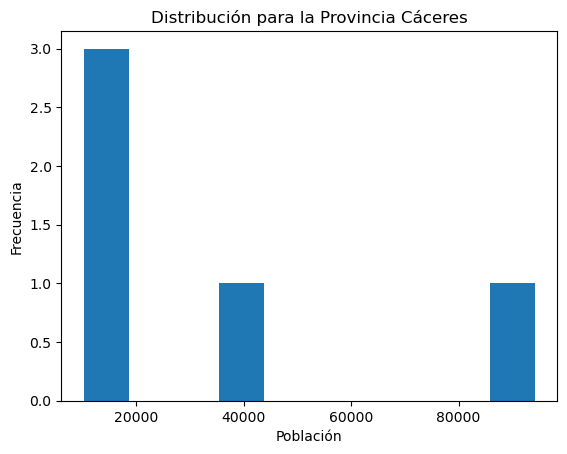

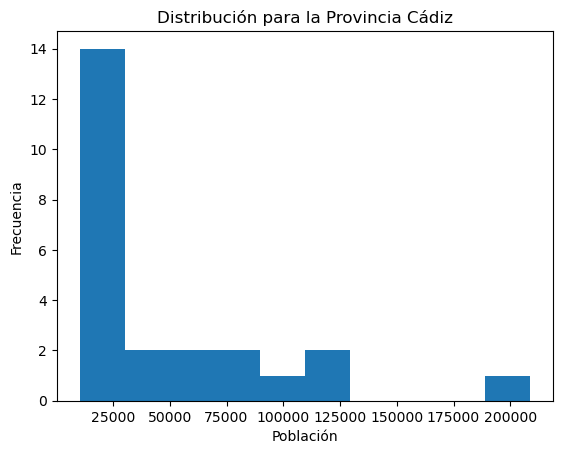

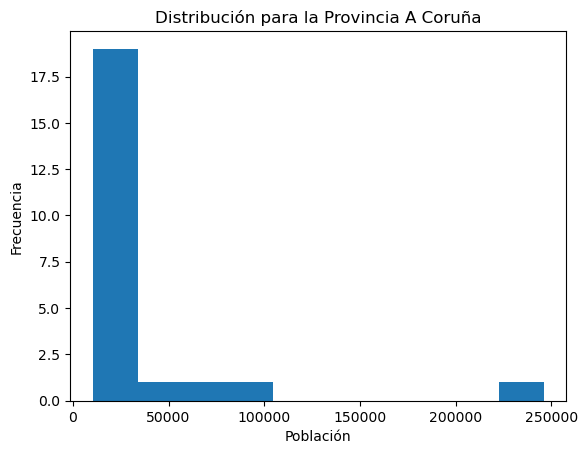

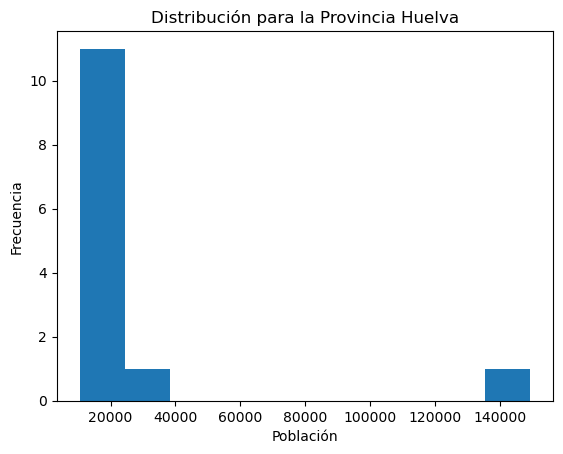

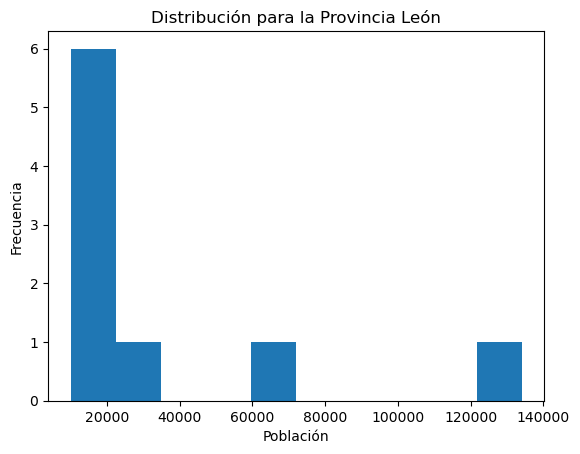

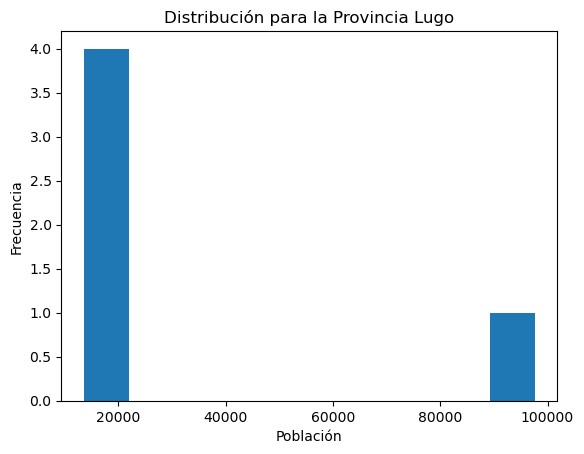

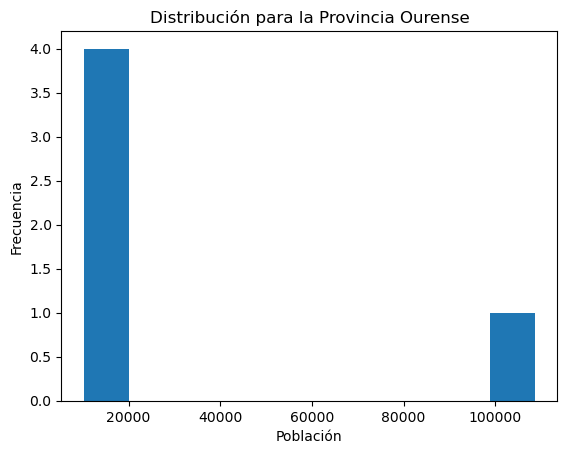

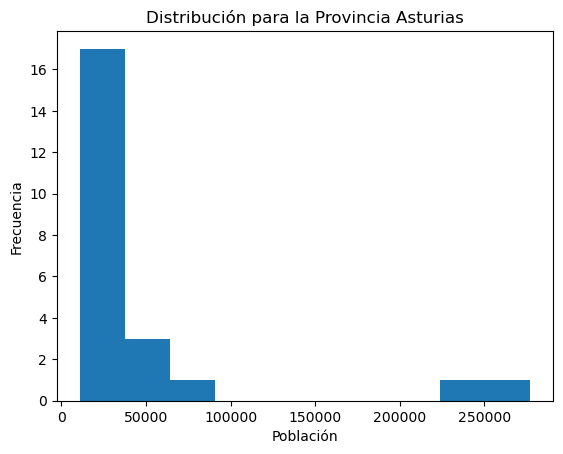

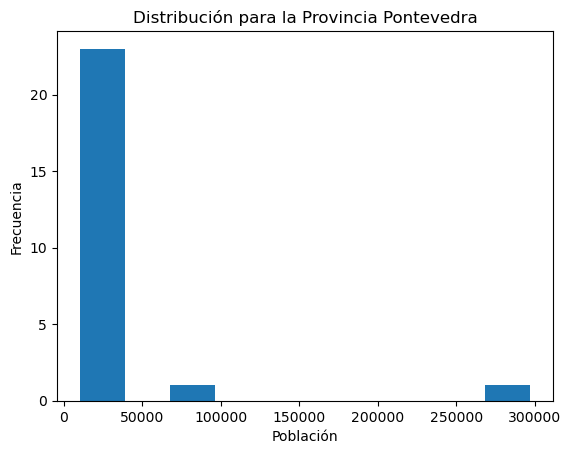

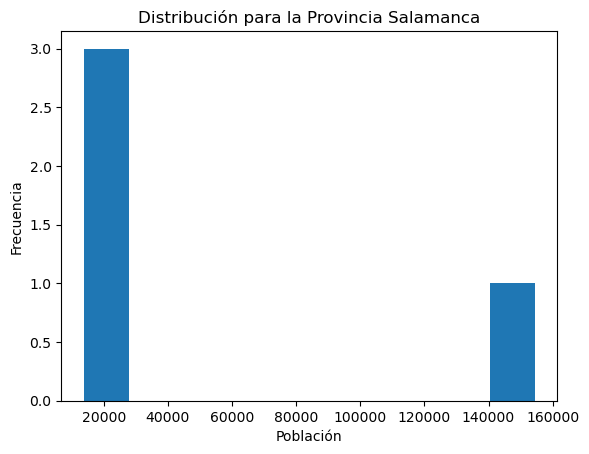

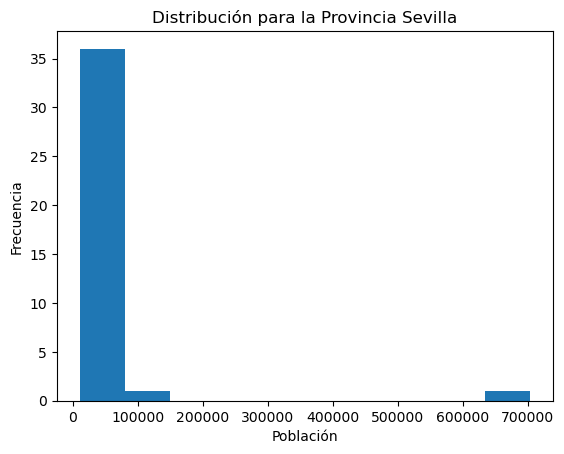

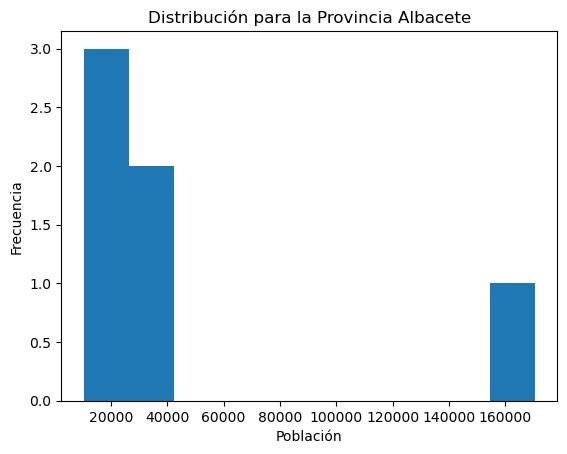

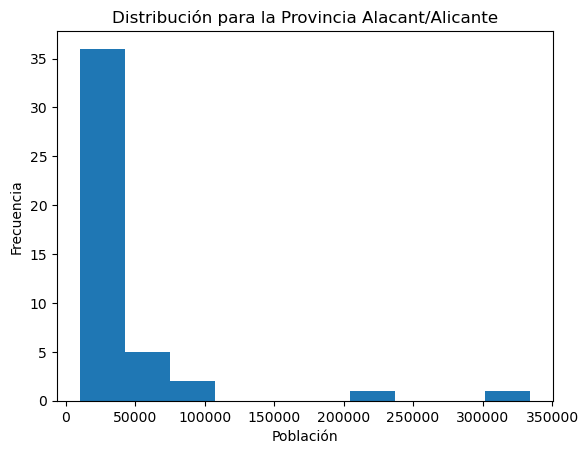

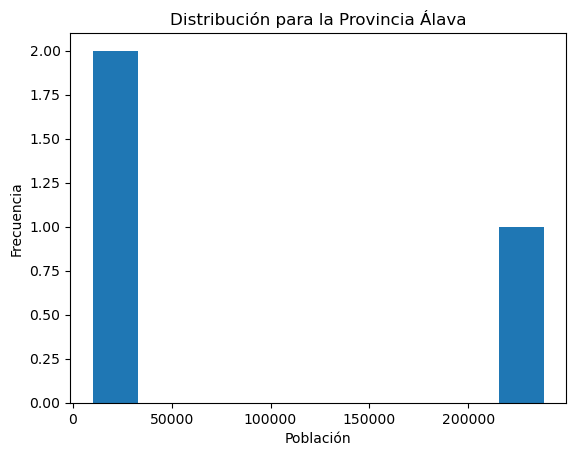

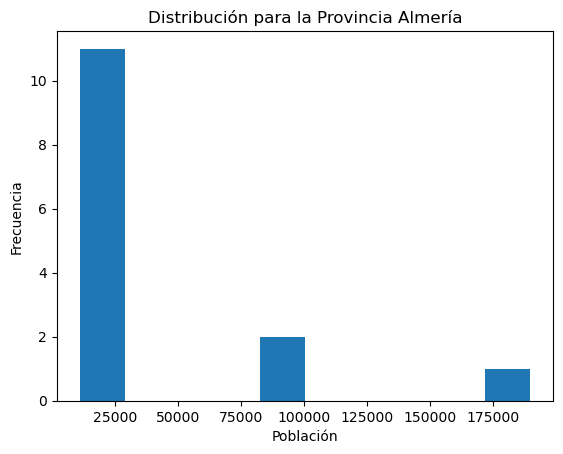

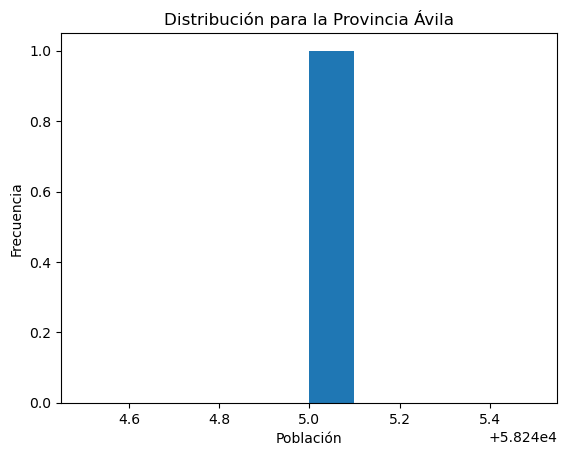

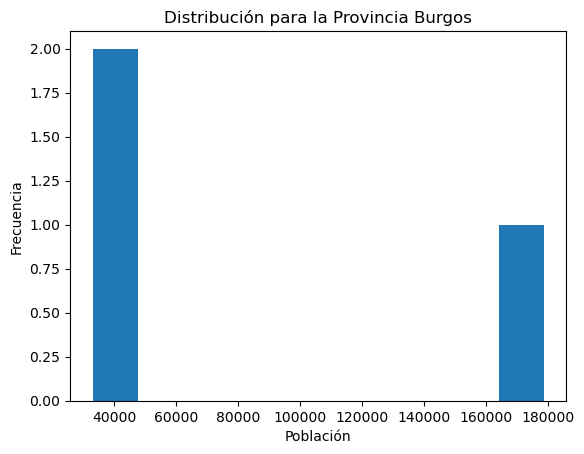

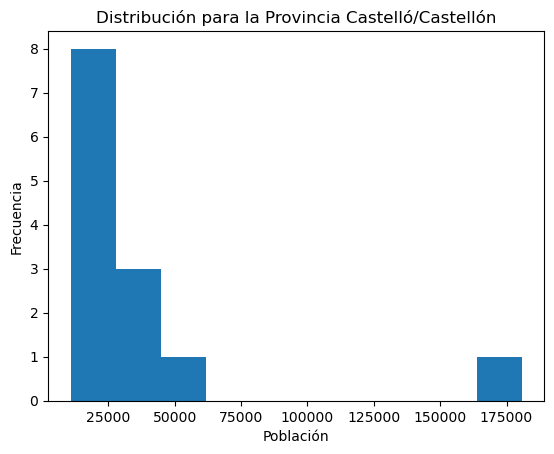

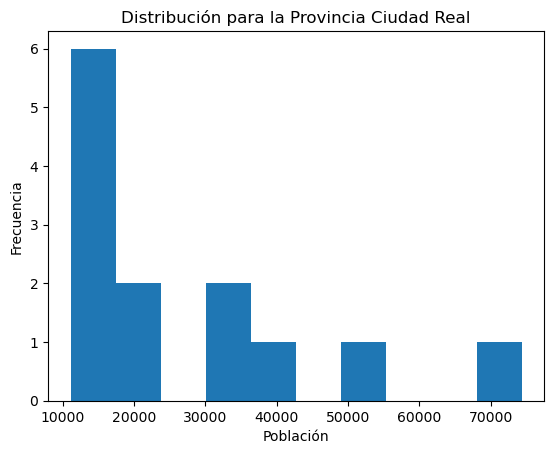

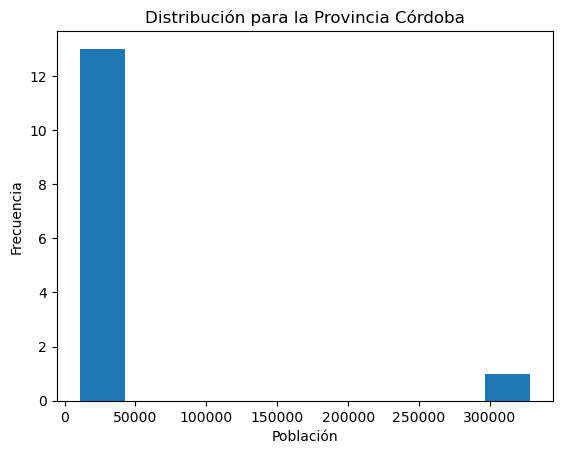

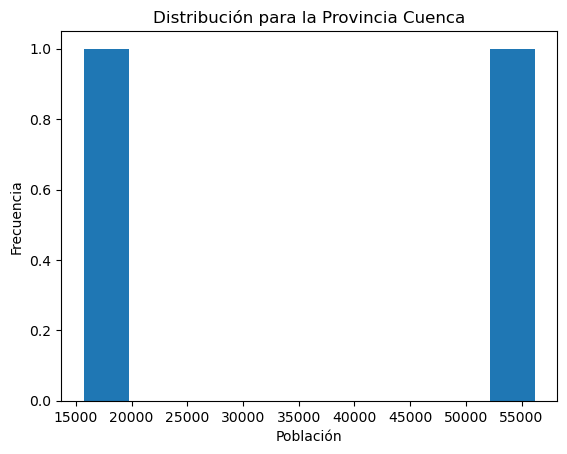

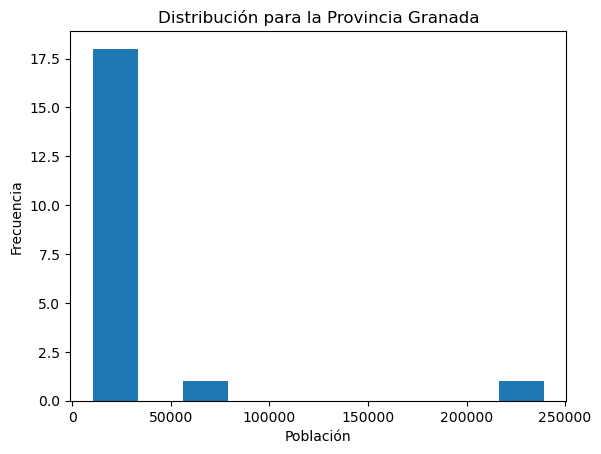

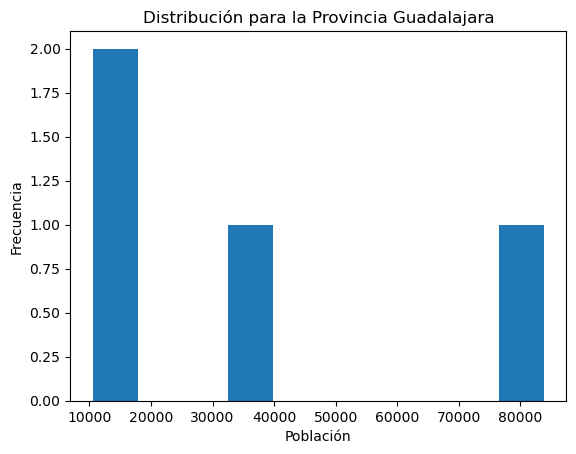

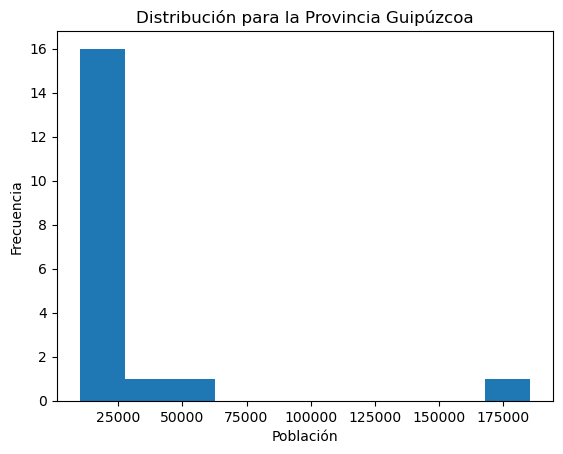

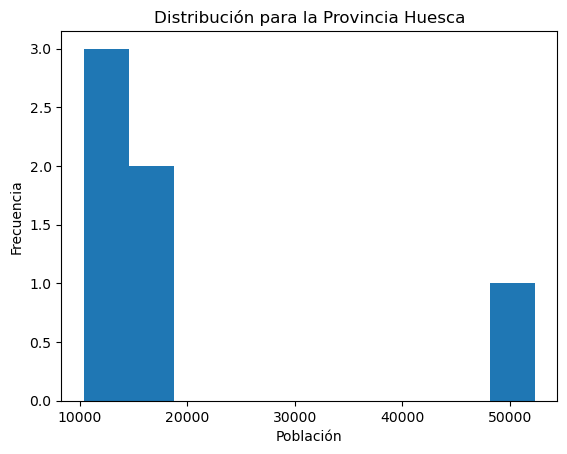

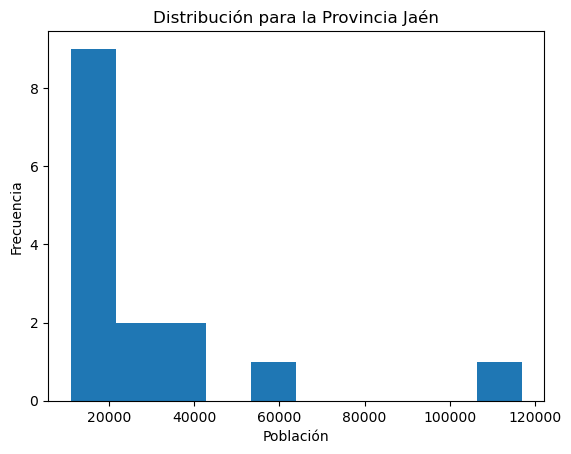

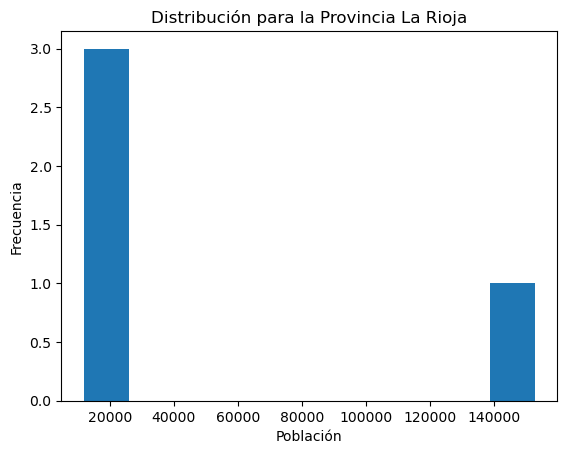

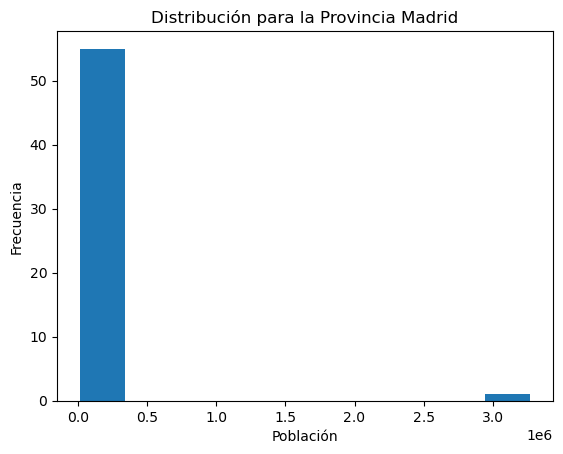

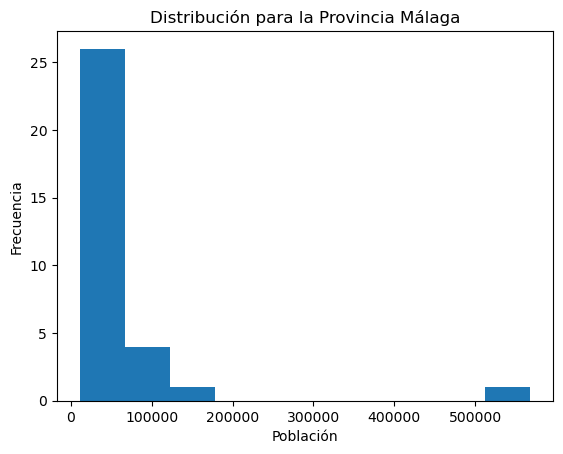

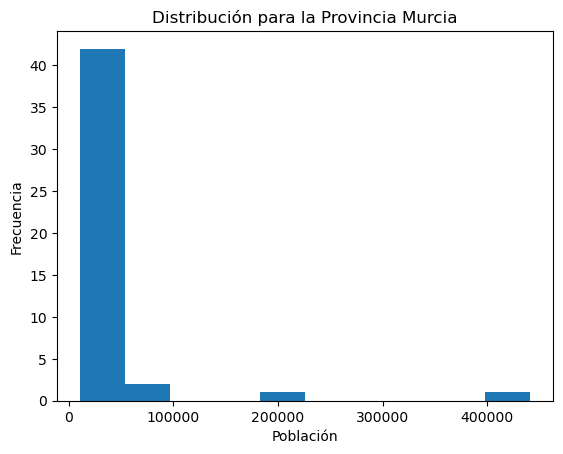

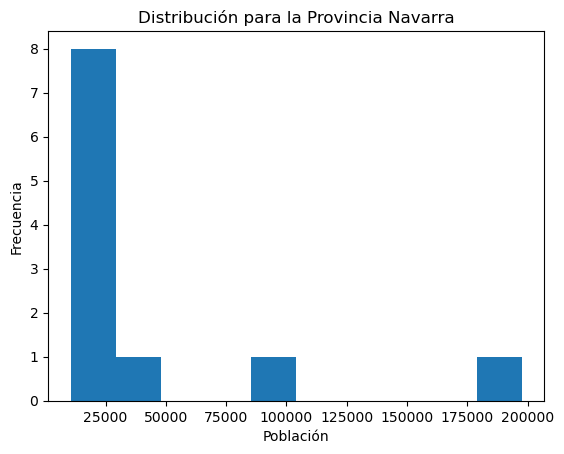

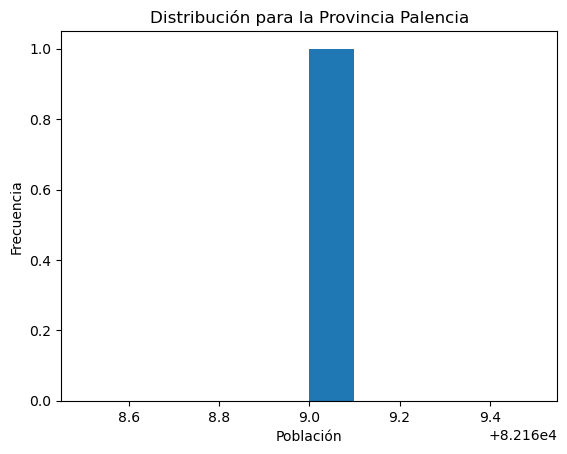

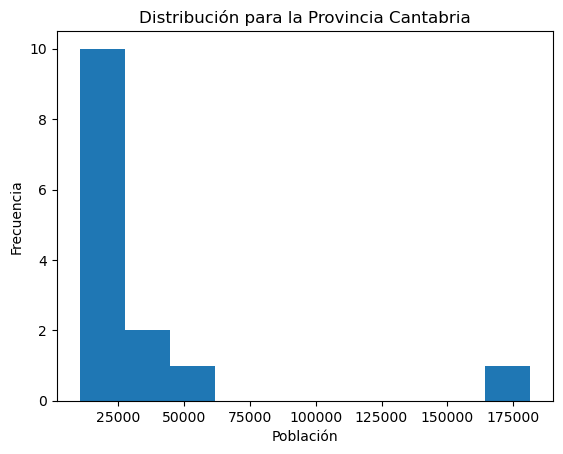

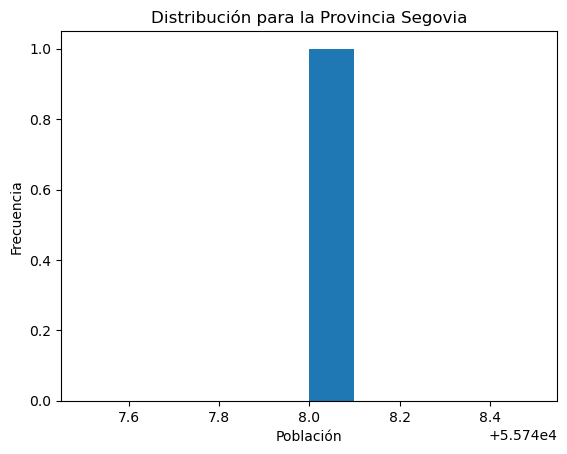

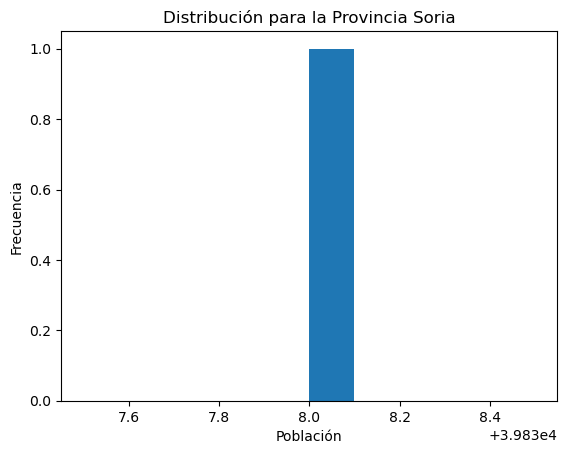

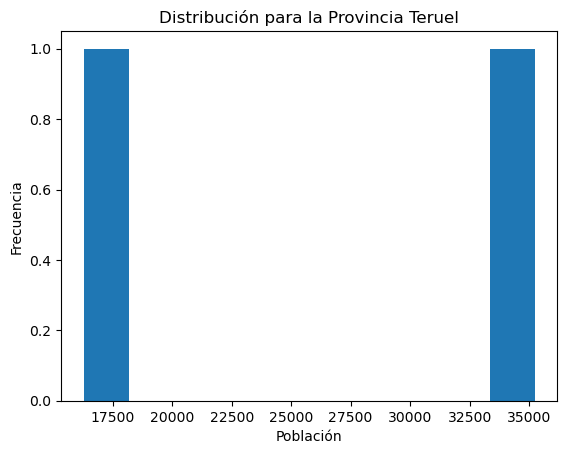

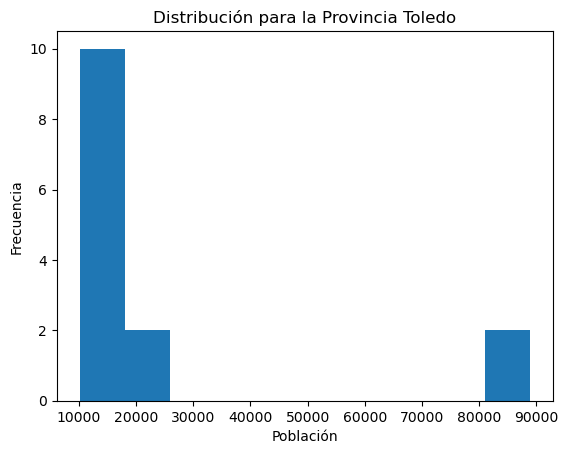

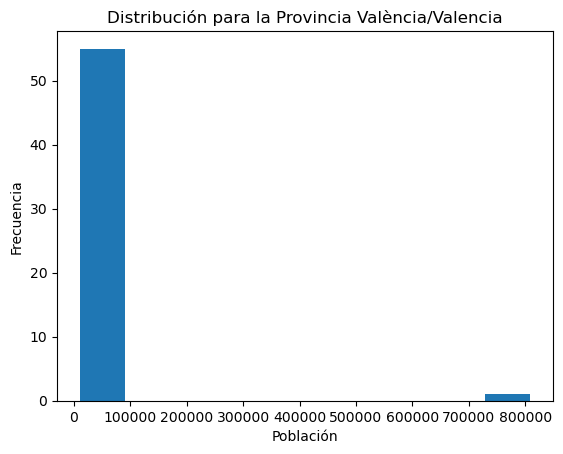

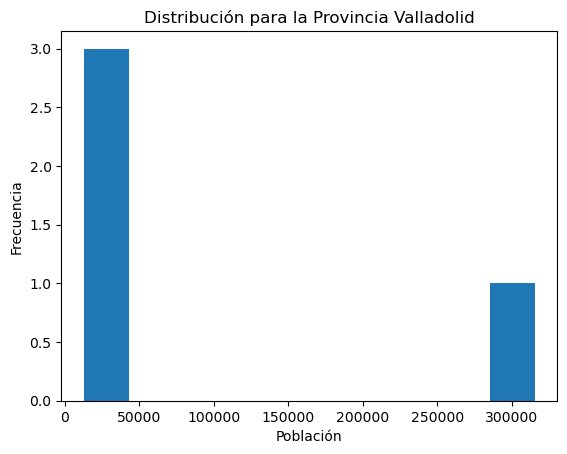

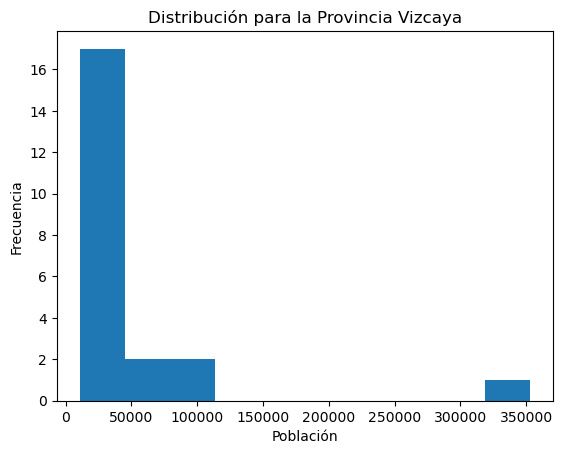

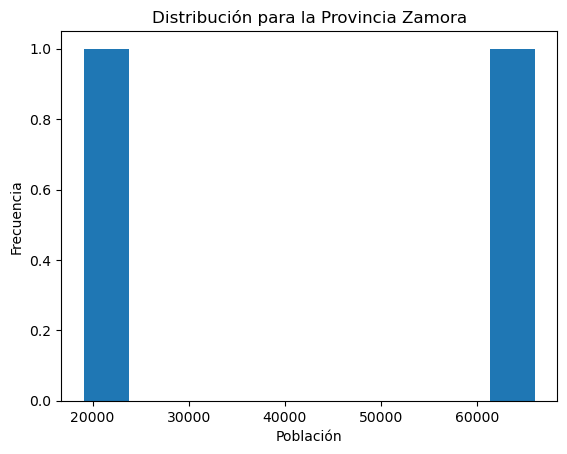

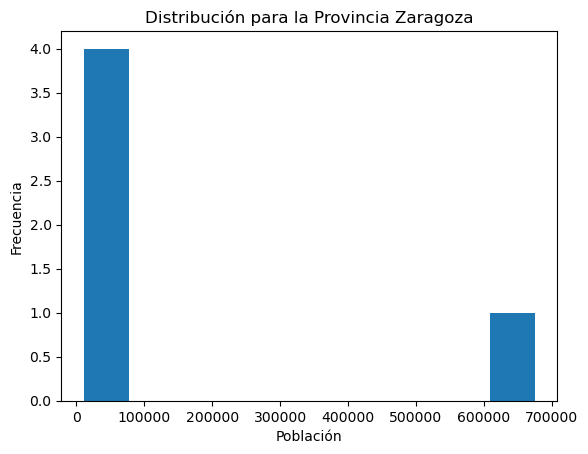

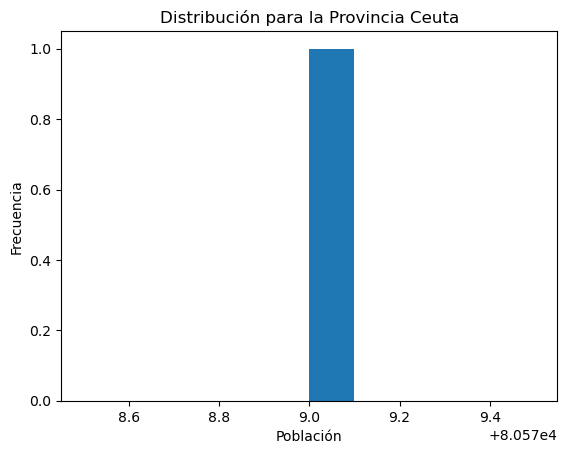

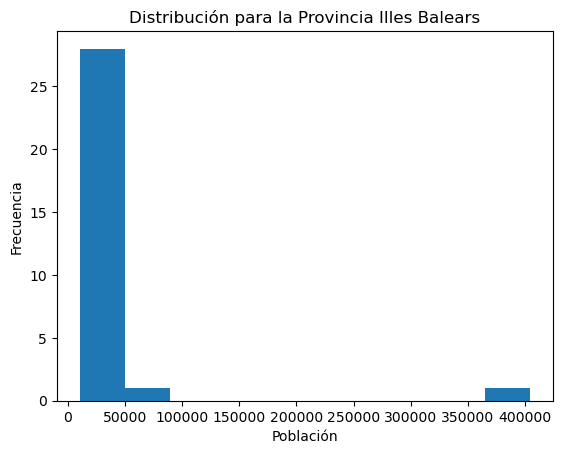

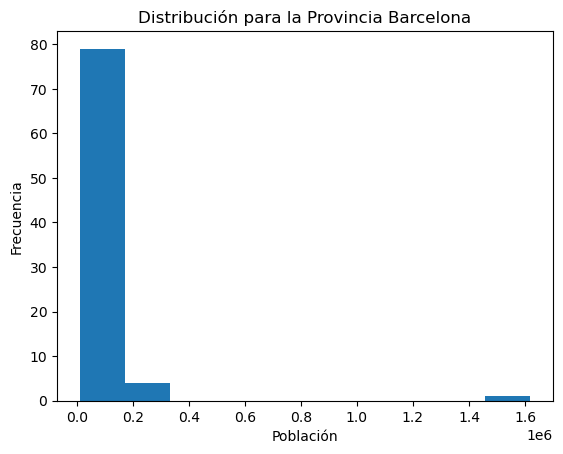

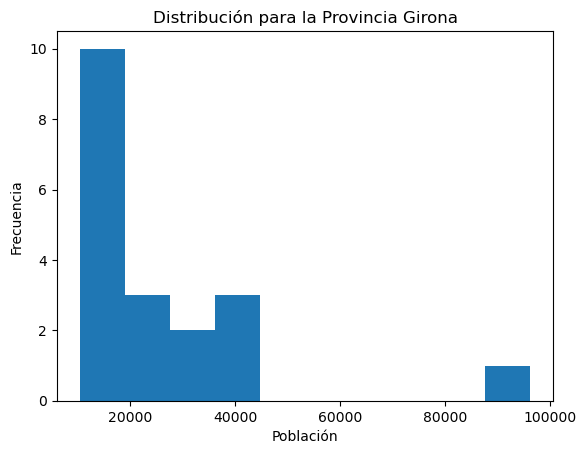

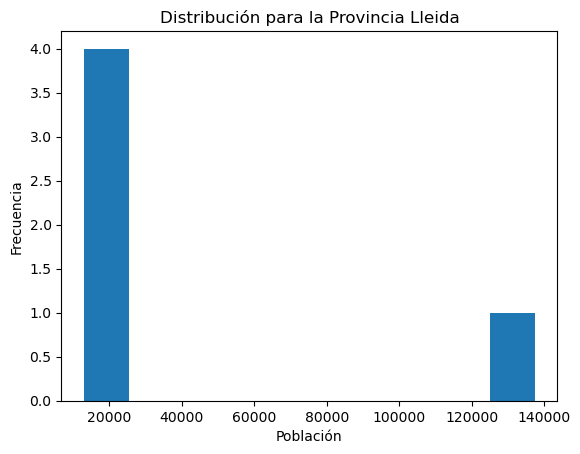

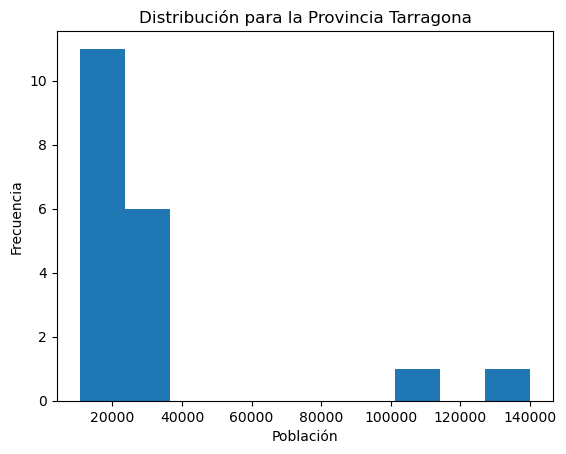

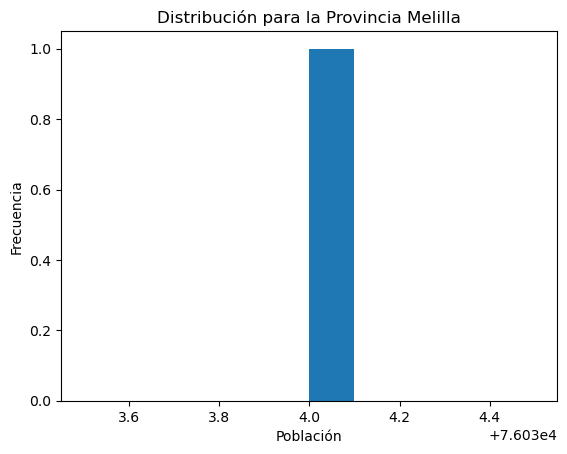

In [32]:

provs = df['Provincia'].unique()
for province in provs:

    cities = df[df['Provincia'] == province]
    plt.hist(cities['Poblacion'], bins=10)

    plt.title('Distribución para la Provincia ' + province)
    plt.xlabel('Población')
    plt.ylabel('Frecuencia')


    plt.show()

7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

In [34]:
df_sample = df.sample(n=50, random_state=1)
df_sample
print(f"La media de la muestra es: {df_sample['Poblacion'].mean()}")
print(f"La desviación estándar de la muestra es: {df_sample['Poblacion'].std()}")

La media de la muestra es: 92968.98
La desviación estándar de la muestra es: 459474.0980776001


8. Liste los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [35]:
from math import radians, sin, cos, sqrt, atan2


def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    a = sin(dLat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dLon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance


def find_nearest_farthest_cities(df, city_name):

    city_row = df.loc[df['Municipio'] == city_name].iloc[0]


    distances = df[df['Municipio'] != 'Madrid'].apply(lambda row: haversine(city_row['Y'], city_row['X'], row['Y'], row['X']), axis=1)


    dfx = df

    dfx['Distancias'] = distances


    nearest_city = dfx.loc[df['Distancias'] == distances.min()].iloc[0]

    farthest_city = dfx.loc[df['Distancias'] == distances.max()].iloc[0]

    return (nearest_city['Municipio'], farthest_city['Municipio'])

nearest_city, farthest_city = find_nearest_farthest_cities(df, 'Madrid')


print('Ciudad más cercana a Madrid: ', nearest_city)
print('Ciudad más lejana a Madrid: ', farthest_city)

Ciudad más cercana a Madrid:  Pozuelo de Alarcón
Ciudad más lejana a Madrid:  Los Llanos de Aridane
